In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

In [36]:
a=pd.read_csv('F:\ML_Project\IRIS\Iris.csv')
iris = pd.DataFrame(a)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
iris.shape

(150, 6)

In [38]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [39]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [40]:
iris.drop('Id',axis=1,inplace=True)

In [41]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
iris[iris['Species'] == 'Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [43]:
iris[iris['Species'] == 'Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [44]:
iris[iris['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


Text(0.5, 1.0, 'Sepal-Length-Width Vs Species')

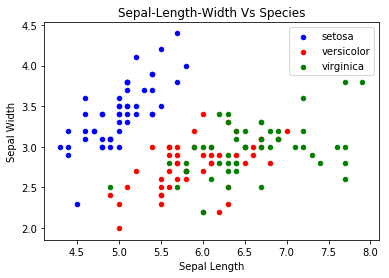

In [45]:
pet_len_wid = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm'
,color = 'blue', label = 'setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Sepal Length')
pet_len_wid.set_ylabel('Sepal Width')
pet_len_wid.set_title('Sepal-Length-Width Vs Species')

Text(0.5, 1.0, 'Petal-Length-Width Vs Species')

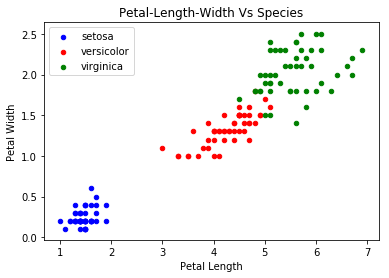

In [46]:
pet_len_wid = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm'
,color = 'blue', label = 'setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'red'
,label = 'versicolor', ax = pet_len_wid)
iris[iris.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'PetalLengthCm', y = 'PetalWidthCm', color = 'green'
,label = 'virginica', ax = pet_len_wid)
pet_len_wid.set_xlabel('Petal Length')
pet_len_wid.set_ylabel('Petal Width')
pet_len_wid.set_title('Petal-Length-Width Vs Species')

In [47]:
test_size = 0.30
#intilization state of a pseudo random number generator is seed
seed = 7
score = 'accuracy'

In [48]:
def models(X_train, Y_train,score):
    clfs = []
    result = []
    names = []
    
    clfs.append(('KNN', KNeighborsClassifier()))
    clfs.append(('CART', DecisionTreeClassifier()))
    
    for algo_name, clf in clfs:
        k_fold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_score = model_selection.cross_val_score(clf, X_train, Y_train, cv=k_fold, scoring=score)
        #result = "%s: %f (%f)" % (algo_name, cv_score.mean(), cv_score.std())
        result.append((algo_name,cv_score.mean(), cv_score.std()))
        names.append(algo_name)
    return (result)

In [49]:
X_all = iris.iloc[:,:4]
Y_all = iris.iloc[:,4]

In [50]:
X_train_all, X_test_all, Y_train_all, Y_test_all = model_selection.train_test_split(X_all, Y_all, test_size=test_size, random_state=seed)

In [51]:
models(X_train_all, Y_train_all, score)

[('KNN', 0.9800000000000001, 0.039999999999999994),
 ('CART', 0.96, 0.06633249580710798)]

In [52]:
X_sep = iris[['SepalLengthCm','SepalWidthCm']]
Y_sep = iris.Species

In [53]:
X_train_sep, X_test_sep, Y_train_sep, Y_test_sep = model_selection.train_test_split(X_sep, Y_sep, test_size=test_size, random_state=seed)

In [54]:
models(X_train_sep, Y_train_sep, score)

[('KNN', 0.82, 0.08496961051307579),
 ('CART', 0.760909090909091, 0.06543560331973862)]

In [58]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_sep, Y_train_sep)
pred = svm.predict(X_test_sep)
print(accuracy_score(Y_test_sep, pred))

0.7111111111111111


F:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
X_p = iris[['PetalLengthCm','PetalWidthCm']]
Y_p = iris.Species

In [60]:
X_train_p, X_test_p, Y_train_p, Y_test_p = model_selection.train_test_split(X_p, Y_p, test_size=test_size, random_state=seed)


In [61]:
models(X_train_p, Y_train_p, score)

[('KNN', 0.9800000000000001, 0.039999999999999994),
 ('CART', 0.9700000000000001, 0.04582575694955839)]

In [62]:
svm = SVC()
svm.fit(X_train_p, Y_train_p)
#prediction
pred = svm.predict(X_test_p)
print(accuracy_score(Y_test_p, pred))


0.9333333333333333


F:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
#Take all relevant Features 
X_rel = iris[['PetalWidthCm', 'SepalLengthCm','SepalWidthCm' ]]
Y_rel = iris.Species

In [64]:
X_train_rel, X_test_rel, Y_train_rel, Y_test_rel = model_selection.train_test_split(X_rel, Y_rel, test_size=test_size, random_state=seed)


In [65]:
models(X_train_rel, Y_train_rel, score)

[('KNN', 0.9609090909090909, 0.06556178084401014),
 ('CART', 0.9518181818181818, 0.04828462445414364)]

In [66]:
## Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_rel, Y_train_rel)
#prediction
pred = svm.predict(X_test_rel)
print(accuracy_score(Y_test_rel, pred))


0.9111111111111111


F:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
#Take all relevant Features from correlation Matrix
X_rel1 = iris[['PetalLengthCm', 'SepalLengthCm','SepalWidthCm' ]]
Y_rel1 = iris.Species

In [68]:
X_train_rel1, X_test_rel1, Y_train_rel1, Y_test_rel1 = model_selection.train_test_split(X_rel1, Y_rel1, test_size=test_size, random_state=seed)

In [69]:
models(X_train_rel1, Y_train_rel1, score)

[('KNN', 0.96, 0.04898979485566354),
 ('CART', 0.9700000000000001, 0.04582575694955839)]

In [70]:
# Evaluation of the Classifier 
# Predictions on test dataset
svm = SVC()
svm.fit(X_train_rel1, Y_train_rel1)
pred = svm.predict(X_test_rel1)
print(accuracy_score(Y_test_rel1, pred))


0.9111111111111111


F:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
